# Supervised Learning with scikit-learn

In [54]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [55]:
# if library is installed, skip
#!pip install numpy==1.24.0 --user
#!pip install pandas==1.5.3 --user
#!pip install matplotlib==3.6 --user
#!pip install scikit-learn==1.2.1 --user

---

## Ch. 1 - Classification

### Machine learning with scikit-learn

In [56]:
# from sklearn.module import Model
# model = Model()
# model.fit(X, y)
# predictions = model.predict(X_new)
# print(predictions)

### Binary classification

In the video, you saw that there are two types of supervised learning — classification and regression. Recall that binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

A dataset, `churn_df`, has been preloaded for you in the console.

Your task is to examine the data and choose which column could be the target variable for binary classification.


In [57]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 10000)

In [58]:
churn_df = pd.read_csv("telecom_churn_clean.csv")

In [59]:
churn_df

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


* customer_service_calls
* total_night_charge
* (X) churn
* account_length

### The supervised learning workflow

Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions.

In [60]:
# from sklearn.module import Model
# model = Model()
# model.fit(X, y)
# predictions = model.predict(X_new)

### The classification challenge

In [61]:
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [62]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [63]:
import numpy as np

In [64]:
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
print(X_new.shape)

(3, 2)


In [65]:
predictions = knn.predict(X_new)

In [66]:
print("Predictions: {}".format(predictions))

Predictions: [1 0 0]


### k-Nearest Neighbors: Fit

In [67]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
X = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict

In [68]:
X_new = np.array([
    [30.0, 17.5],
    [107.0, 24.1],
    [213.0, 10.9]
])
X_new.shape

(3, 2)

In [69]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


### Measuring model performance

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [71]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.852


In [72]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

In [73]:
import matplotlib.pyplot as plt

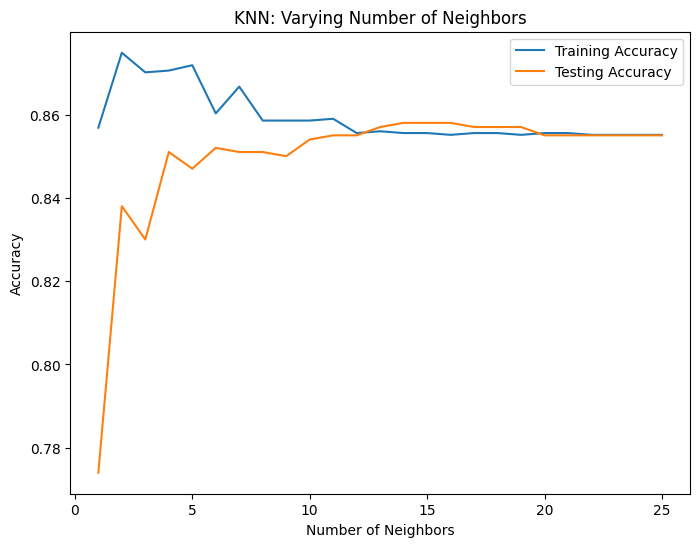

In [74]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

### Train/test split + computing accuracy

In [75]:
# Why doesn't this work but the next one works?
# AttributeError: 'NoneType' object has no attribute 'split'
# expected to return a string actually returns None instead.
# changing version type of libraries like scikit learn, numpy, pandas didn't do anything
# either locate the column with None and adjust or choose the X predictors 

# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


In [76]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8515742128935532


### Overfitting and underfitting

In [77]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors = neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
    
# Display train and test accuracies
display(neighbors, '\n', train_accuracies, '\n', test_accuracies)

for neighbor in neighbors:
    print(f"Neighbor: {neighbor}, Train Accuracy: {train_accuracies[neighbor]:.6f}, Test Accuracy: {test_accuracies[neighbor]:.6f}")

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

'\n'

{1: 0.8627156789197299,
 2: 0.8754688672168042,
 3: 0.8735933983495874,
 4: 0.8709677419354839,
 5: 0.8717179294823706,
 6: 0.8675918979744937,
 7: 0.8687171792948237,
 8: 0.86384096024006,
 9: 0.8653413353338335,
 10: 0.8634658664666166,
 11: 0.86384096024006,
 12: 0.8615903975993998}

'\n'

{1: 0.7916041979010495,
 2: 0.8575712143928036,
 3: 0.8500749625187406,
 4: 0.8590704647676162,
 5: 0.8515742128935532,
 6: 0.856071964017991,
 7: 0.8500749625187406,
 8: 0.8530734632683659,
 9: 0.8590704647676162,
 10: 0.8590704647676162,
 11: 0.8605697151424287,
 12: 0.856071964017991}

Neighbor: 1, Train Accuracy: 0.862716, Test Accuracy: 0.791604
Neighbor: 2, Train Accuracy: 0.875469, Test Accuracy: 0.857571
Neighbor: 3, Train Accuracy: 0.873593, Test Accuracy: 0.850075
Neighbor: 4, Train Accuracy: 0.870968, Test Accuracy: 0.859070
Neighbor: 5, Train Accuracy: 0.871718, Test Accuracy: 0.851574
Neighbor: 6, Train Accuracy: 0.867592, Test Accuracy: 0.856072
Neighbor: 7, Train Accuracy: 0.868717, Test Accuracy: 0.850075
Neighbor: 8, Train Accuracy: 0.863841, Test Accuracy: 0.853073
Neighbor: 9, Train Accuracy: 0.865341, Test Accuracy: 0.859070
Neighbor: 10, Train Accuracy: 0.863466, Test Accuracy: 0.859070
Neighbor: 11, Train Accuracy: 0.863841, Test Accuracy: 0.860570
Neighbor: 12, Train Accuracy: 0.861590, Test Accuracy: 0.856072


### Visualizing model complexity

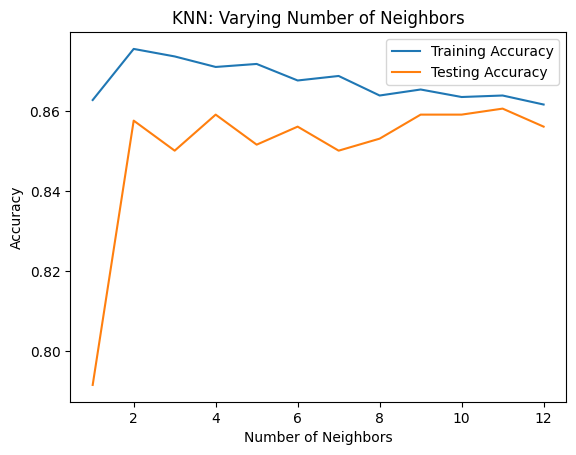

In [78]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

---

## Ch. 2 - Regression

### Introduction to regression

In [119]:
import pandas as pd
diabetes_df = pd.read_csv("diabetes_clean.csv")
display(diabetes_df.head())

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
# with and without .values
X = diabetes_df.drop("glucose", axis = 1)
y = diabetes_df["glucose"]
print(type(X), type(y))

X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [121]:
# numpy can slice [row,column] start:end
# slicing can be confusing
# X[row: start_row:end_row, collumn]
X_bmi = X[:,3]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [122]:
# Must have row and column to fit sklearn model
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


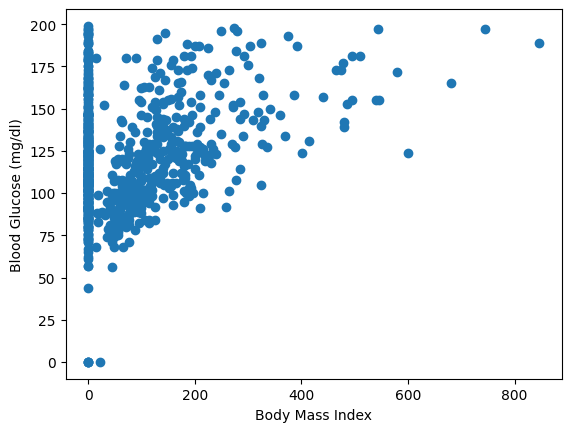

In [123]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

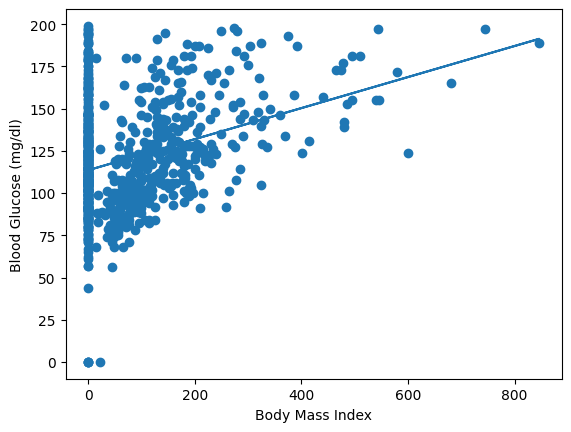

In [124]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### Creating features

In [125]:
sales_df = pd.read_csv("advertising_and_sales_clean.csv")

In [126]:
import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model

In [127]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5]) # [no. of predictions start:end]

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualizing a linear regression model

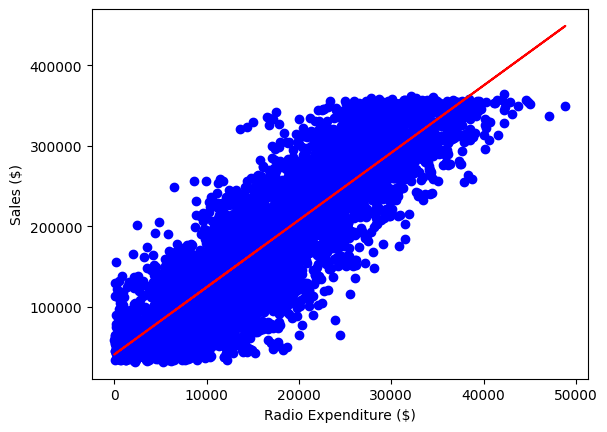

In [128]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

### The basics of linear regression

You need stratify if:

Your target variable is categorical.\
The class distribution in your target variable is imbalanced.\
You want to ensure that both training and test sets are representative of the original class distribution.

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X and y are your features and target variable respectively

# Split the data into training and test sets
# test_size = 0.3 means 30% of the data will be used for testing, and 70% for training
# random_state = 42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the LinearRegression model
reg_all = LinearRegression()

# Fit the model to the training data
reg_all.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_all.predict(X_test)

In [114]:
reg_all.score(X_test, y_test)

0.9990150033349248

In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

8671510.452219872

### Fit and predict for regression

In [110]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv')
display(sales_df)
# 'columns' is influencer
# 'prefix' is create col name with influencer_subcolumn
sales_df = pd.get_dummies(sales_df, columns=['influencer'], prefix='influencer')
display(sales_df)

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


,tv,radio,social_media,sales,influencer_Macro,influencer_Mega,influencer_Micro,influencer_Nano
0,16000.0,6566.23,2907.98,54732.76,0,1,0,0
1,13000.0,9237.76,2409.57,46677.90,0,1,0,0
2,41000.0,15886.45,2913.41,150177.83,0,1,0,0
3,83000.0,30020.03,6922.30,298246.34,0,1,0,0
4,15000.0,8437.41,1406.00,56594.18,0,0,1,0
...,...,...,...,...,...,...,...,...
4541,26000.0,4472.36,717.09,94685.87,0,0,1,0
4542,71000.0,20610.69,6545.57,249101.92,0,0,0,1
4543,44000.0,19800.07,5096.19,163631.46,0,0,1,0
4544,71000.0,17534.64,1940.87,253610.41,1,0,0,0


In [93]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53135.43066453 71060.6004603 ], Actual Values: [55261.28 67574.9 ]


### Regression performance

In [94]:
# R^2 is proportion of variance between 2 variable (independent and dependent);
# You have to figure out what is independent/predictor variable 
# and dependent/target variable
# R^2 == 1 is perfect prediction; 
# high R^2 can mean overfitting
# variance/variability is spread of data
# low variance is ideal (low residual value)
# residual is difference between prediction and 
# actual point (represent in mean/trend/line/regression)  
# correlation is relationship 2 variable

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared = False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990150033349248
RMSE: 2944.742849931021


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Cross-validation

In [95]:
# from sklearn.model_selection import cross_val_score, KFold
# kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
# reg = LinearRegression()
# cv_results = cross_val_score(reg, X, y, cv = kf)

In [96]:
# print(cv_results)

In [97]:
# print(np.mean(cv_results), np.std(cv_results))

In [98]:
# print(np.quantile(cv_results, [0.025, 0.975]))

### Cross-validation for R-squared

In [99]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits = 6, shuffle = True, random_state = 5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv = kf)

# Print scores
print(cv_scores)

[0.99893896 0.99909078 0.99900929 0.99896318 0.99889195 0.99903855]


### Analyzing cross-validation metrics

In [100]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989887858587477
6.559306063470636e-05
[0.99889783 0.99908425]


### Regularized regression

[Video]

In [101]:
# from sklearn.linear_model import Ridge
# score = []
# for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
#   ridge = Ridge(alpha = alpha)
#   ridge.fit(X_train, y_train)
#   y_pred = ridge.predict(X_test)
#   scores.append(ridge.score(X_test, y_test))
# print(scores)

In [102]:
# from sklearn.linear_model import Lasso
# score = []
# for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
#   lasso = Lasso(alpha = alpha)
#   lasso.fit(X_train, y_train)
#   lasso.pred = lasso.predict(X_test)
#   scores.append(lasso.score(X_test, y_test))
# print(scores)

In [103]:
# from sklearn.linear_model import Lasso
# X = diabetes_df.drop("glucose", axis = 1).values
# y = diabetes_df["glucose"].values
# names = diabetes_df.drop("glucose", axis = 1).columns
# lasso = Lasso(alpha = 0.1)
# lasso_coef = lasso.fit(X, y).coef_
# plt.bar(names, lasso_coef)
# plt.xticks(rotation = 45)
# plt.show()

### Regularized regression: Ridge

In [104]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990150033934493, 0.9990150039191462, 0.9990150090764298, 0.9990150521414333, 0.999015182881188, 0.9990152130441597]


### Lasso regression for feature importance

In [105]:
sales_columns = ["tv", "radio", "social_media"]

[ 3.56256515e+00 -3.91091923e-03  4.48078397e-03  5.20256349e+01
  6.36710895e+01 -2.43916497e+00 -1.94418673e+01]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (7,).

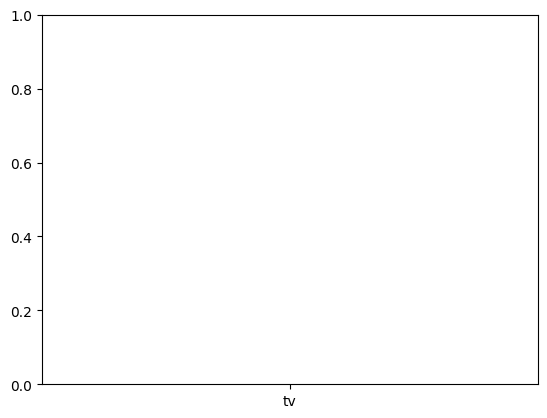

In [106]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

---

## Ch. 3 - Fine-Tuning Your Model


### How good is your model?

[Video]

In [ ]:
# from sklearn.metrics import classification_report,  confusion_matrix
# knn = KNeighborsClassifier(n_neighbors = 7)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

In [ ]:
# print(confusion_matrix(y_test, y_pred))

In [ ]:
# print(classification_report(y_test, y_pred))

### Deciding on a primary metric

As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

* A model predicting the presence of cancer as the positive class.
* A classifier predicting the positive class of a computer program containing malware.
* (X) A model predicting if a customer is a high-value lead for a sales team with limited capacity.

### Assessing a diabetes prediction classifier

In [ ]:
diabetes_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/DataCamp/_Career Track/Python/Machine Learning Scientist with Python/diabetes_df.csv")
X = diabetes_df.drop("diabetes", axis = 1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Import confusion matrix
from sklearn.metrics import classification_report,  confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Logistic regression and the ROC curve

[Video]

In [ ]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

In [ ]:
# y_pred_probs = logreg.predict_proba(X_test[:, 1])
# print(y_pred_probs[0])

In [ ]:
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
# plt.plot([0, 1], [0, 1], "k--")
# plt.plot(fpr, tpr)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Logistic Regression ROC Curve")
# plt.show()

In [ ]:
# from sklearn.metrics import roc_auc_score
# print(roc_auc_score(y_test, y_pred_probs))

### Building a logistic regression model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

### The ROC curve

In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

Well done on producing the ROC curve for the diabetes prediction model.

But, what does the plot tell you about the model's performance?


* The model is about as good as randomly guessing the class of each observation.
* The model is much worse than randomly guessing the class of each observation.
* (X) The model is much better than randomly guessing the class of each observation.
* It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.

### ROC AUC

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

### Hyperparameter tuning

[Video]

In [ ]:
# from sklearn.model_selection import GridSearchCV
# kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
# param_grid = {"alpha": np.arange(0.0001, 1, 10),
#               "solver": ["sag", "lsqr"]}
# ridge = Ridge()
# ridge_cv = GridSearchCV(ridge, param_grid, cv = kf)
# ridge_cv.fit(X_train, y_train)
# print(ridge_cv.best_params_, ridge_cv.best_score_)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
# param_grid = {"alpha": np.arange(0.0001, 1, 10),
#               "solver": ["sag", "lsqr"]}
# ridge = Ridge()
# ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter = 2)
# ridge_cv.fit(X_train, y_train)
# print(ridge_cv.best_params_, ridge_cv.best_score_)

In [ ]:
# test_score = ridge_cv.score(X_test, y_test)
# print(test_score)

### Hyperparameter tuning with GridSearchCV

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

### Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv = kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

---

## Ch. 4 - Preprocessing and Pipelines

### Preprocessing data

[Video]

In [ ]:
# import pandas as pd
# music_df = pd.read_csv("music.csv")
# music_dummies = pd.get_dummies(music_df["genre"], drop_first = True)
# print(music_dummies.head())

In [ ]:
# music_dummies = pd.concat([music_df, music_dummies], axis = 1)
# music_dummies = music_dummies.drop("genre", axis = 1)

In [ ]:
# music_dummies = pd.get_dummies(music_df, drop_first = True)
# print(music_dummies.columns)

In [ ]:
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.linear_model import LinearRegression
# X = music_dummies.drop("popularity", axis = 1).values
# y = music_dummies["popularity"].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
# linereg = LinearRegression()
# linreg_cv = cross_val_score(linreg, X_train, y_train, cv = kf, scoring = "neg_mean_squared_error")
# print(np.sqrt(-linreg_cv))

### Creating dummy variables

In [ ]:
music_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/DataCamp/_Career Track/Python/Machine Learning Scientist with Python/music_df.csv")

In [ ]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first = True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

### Regression with categorical features

In [ ]:
# Create X and y
X = music_dummies.drop("popularity", axis = 1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha = 0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

### Handling missing data

[Video]

In [ ]:
# print(music_df.isna().sum().sort_values())

In [ ]:
# music_df = music.df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

In [ ]:
# from sklearn.impute import SimpleImputer
# X_cat = music_df["genre"].values.reshape(-1, 1)
# X_num = music_df.drop(["genre", "popularity"], axis = 1).values
# y = music_df["popularity"].values
# X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size = 0.2, random_state = 12)
# X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size = 0.2, random_state = 12)
# imp_cat = SimpleImputer(strategy = "most_frequent")
# X_train_cat = imp_cat.fit_transform(X_train_cat)

In [ ]:
# imp_num = SimpleImputer()
# X_train_num = imp_num.fit_transform(X_train_num)
# X_test_num = imp_num.transform(X_test_num)
# X_train = np.append(X_train_num, X_train_cat, axis = 1)

In [ ]:
# from sklearn.pipeline import Pipeline
# music_df = music_df.dropna(subset = ["genre", "popularity", "loudness", "liveness", "tempo"])
# music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

In [ ]:
# steps = [("imputation", SimpleImputer()),
#          ("logistic_regression", LogisticRegression())]
# pipeline = Pipeline(steps)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# pipeline.fit(X_train, y_train)
# pipeline.score(X_test, y_test)

### Dropping missing data

In [ ]:
music_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/DataCamp/_Career Track/Python/Machine Learning Scientist with Python/music_df_na.csv")

In [ ]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

### Pipeline for song genre prediction: I

In [ ]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), ("knn", knn)]

### Pipeline for song genre prediction: II

In [ ]:
imp_mean = SimpleImputer(strategy = "mean")

In [ ]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

### Centering and scaling

[Video]

In [ ]:
# print(music_df[["duration_ms", "loudness", "speechiness"]].describe())

In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = music_df.drop("genre", axis = 1).values
# y = music_df["genre"].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# print(np.mean(X), np.std(X))
# print(np.mean(X_train_scaled), np.std(X_train_scaled))

In [ ]:
# steps = [("scaler", StandardScaler()),
#          ("knn", KNeighborsClassifier(n_neoghbors = 6))]
# pipeline = Pipeline(steps)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)
# knn_scaled = pipeline.fit(X_train, y_train)
# y_pred = knn_scaled.predict(X_test)
# print(knn_scaled.score(X_test, y_test))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)
# knn_unscaled = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
# print(knn_unscaled.score(X_test, y_test))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# steps = [("scaler", StandardScaler()),
#          ("knn", KNeighborsCLassifier())]
# pipeline = Pipeline(steps)
# parameters = {"knn__n_neighbors": np.arange(1, 50)}
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)
# cv = GridSearchCV(pipeline, param_grid = parameters)
# cv.fit(X_train, y_train)

In [ ]:
# print(cv.best_score_)
# print(cv.best_params_)

### Centering and scaling for regression

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

### Centering and scaling for classification

In [ ]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)